In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import pandas as pd

# Load the cleaned dataset (after your transformations)
df = pd.read_csv("data/credit_clean.csv")

# Quick check
df.head()


,ID,Credit_Limit,Gender,Education,Marital_Status,Age,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Next_Month,Delinquency_Stage,Repayment_Ratio,Repayment_Band,AB_Test_Group,Collection_Channel
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,Early,0.089434,0–25%,Control,Field
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,Current,0.292791,25–75%,Test,Call
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,Current,0.108388,0–25%,Control,SMS
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,Current,0.036259,0–25%,Control,Field
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,Current,0.540054,25–75%,Control,SMS


In [20]:
# 1. Default rate overall
default_rate = df['Default_Next_Month'].mean()
print(f"Default Rate: {default_rate:.2%}")

Default Rate: 22.12%


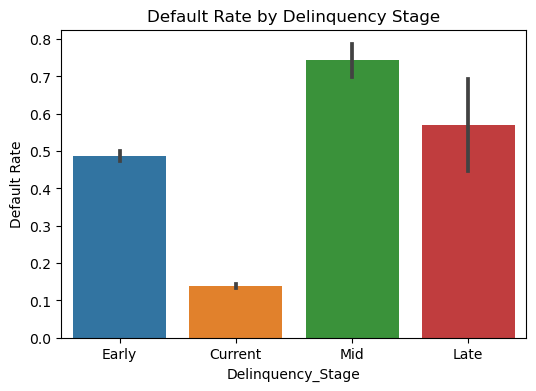

In [21]:
# 2. Default rate by Delinquency Stage
plt.figure(figsize=(6,4))
sns.barplot(x='Delinquency_Stage', y='Default_Next_Month', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Default Rate by Delinquency Stage")
plt.ylabel("Default Rate")
plt.show()

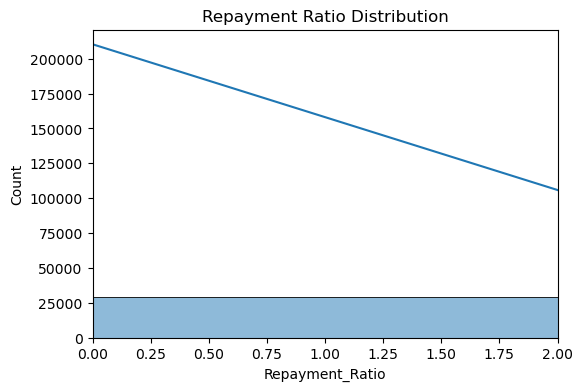

In [22]:
# 3. Distribution of Repayment Ratio
plt.figure(figsize=(6,4))
sns.histplot(df['Repayment_Ratio'], bins=50, kde=True)
plt.title("Repayment Ratio Distribution")
plt.xlim(0,2)  # zoom in (cap at 200%)
plt.show()

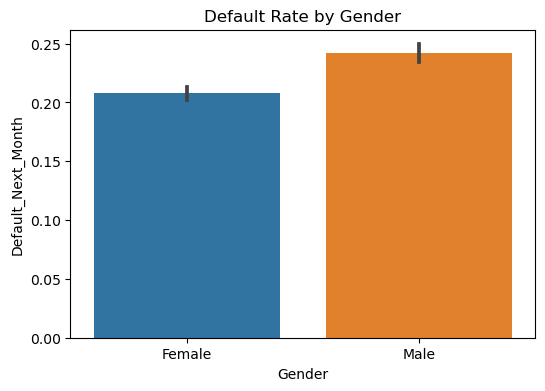

In [23]:
# 4. Default rate by Demographics
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Default_Next_Month', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Default Rate by Gender")
plt.show()

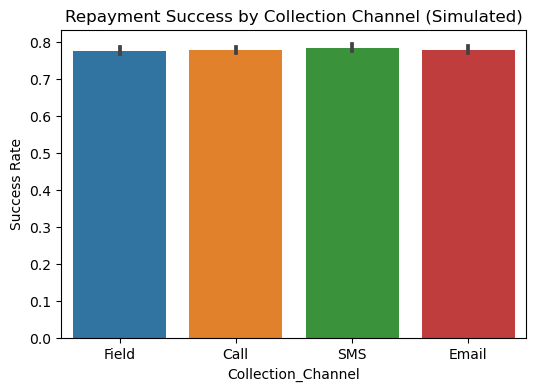

In [24]:
# 5. Collection Channel effectiveness (simulated)
plt.figure(figsize=(6,4))
sns.barplot(x='Collection_Channel', y='Default_Next_Month', data=df, estimator=lambda x: 1 - (sum(x)/len(x)))
plt.title("Repayment Success by Collection Channel (Simulated)")
plt.ylabel("Success Rate")
plt.show()